# Demo HyperMapper: 
# a Practical Design Space Exploration Framework 

You are looking for a parameter setting that minimizes some performance metric of your algorithm (such as runtime, error, or cost). 

To use HyperMapper for this purpose you need to tell it about your parameters and how to evaluate your algorithm's performance. 

We will show how to do this on a running example using a simple 1-dimensional version of the Branin function (https://www.sfu.ca/~ssurjano/branin.html). 

We look for minimizing the value of this function given the parameter x1.

### Example 1: The Branin Black-box Function
Consider the 1-dimensional Branin black-box function evaluation (which depends on the input variables x1), this is the objective we want to minimize:

In [1]:
import math
def branin_function(X):
    x1 = X['x1']
    a = 1.0
    b = 5.1 / (4.0 * math.pi * math.pi)
    c = 5.0 / math.pi
    r = 6.0
    s = 10.0
    t = 1.0 / (8.0 * math.pi)
    x2 = 2.275

    value = a * (x2 - b * x1 * x1 + c * x1 - r) ** 2 + s * (1 - t) * math.cos(x1) + s

    return value

We can plot the 1D Branin function and visualize the optimum (the minimum):

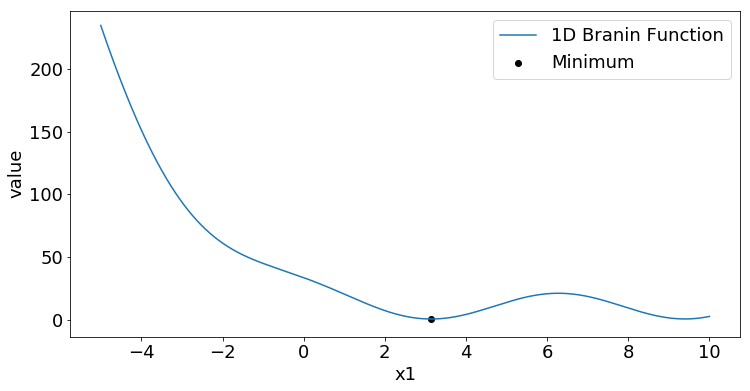

The 1d Branin function has one global optimum at x1 = π
(x, y) at minimum is: (3.141592653589793,0.39788735772973816)


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['font.size'] = 18
point_size = matplotlib.rcParams['lines.markersize']**2.8
point_size_optimum = matplotlib.rcParams['lines.markersize']**2

optimum = math.pi
value_at_optimum=branin_function({'x1': optimum})

# Sample 1000 (x,y) pairs from the function to plot its curve
branin_line_xs = np.linspace(-5, 10, 1000)
branin_line_ys = []
for x in branin_line_xs:
    y = branin_function({'x1': x})
    branin_line_ys.append(y)
plt.plot(branin_line_xs, branin_line_ys, label="1D Branin Function")

# Mark the known optimum on the curve
plt.scatter(optimum, value_at_optimum, s=point_size_optimum, marker='o', color="black", label="Minimum")

plt.legend()
plt.xlabel("x1")
plt.ylabel("value")
plt.show()
print("The 1d Branin function has one global optimum at x1 = \u03C0", flush=True)
print("(x, y) at minimum is: ("+str(optimum)+","+str(value_at_optimum)+")", flush=True)

### Setup HyperMapper to Run on Branin

The inputs to HyperMapper specify an instance of the software configuration problem. In this example, we are showing how to optimize the Branin function value with a single dimension. The following is what needs to be specified as a json syntax to run Branin:

We create the json in python and then dump it on a file: 

In [3]:
import json
scenario = {}
scenario["application_name"] = "1d_branin"
scenario["optimization_objectives"] = ["value"]

number_of_RS = 5
scenario["design_of_experiment"] = {}
scenario["design_of_experiment"]["number_of_samples"] = number_of_RS

scenario["optimization_iterations"] = 15

scenario["input_parameters"] = {}
x1 = {}
x1["parameter_type"] = "real"
x1["values"] = [-5, 10]

scenario["input_parameters"]["x1"] = x1

with open("example_1d_branin_scenario.json", "w") as scenario_file:
    json.dump(scenario, scenario_file, indent=4)


To double check, print the json generated: 

In [4]:
f = open("example_1d_branin_scenario.json", "r")
text = f.read()
print(text, flush=True)
f.close()

{
    "application_name": "1d_branin",
    "optimization_objectives": [
        "value"
    ],
    "design_of_experiment": {
        "number_of_samples": 5
    },
    "optimization_iterations": 15,
    "input_parameters": {
        "x1": {
            "parameter_type": "real",
            "values": [
                -5,
                10
            ]
        }
    }
}


### Run HyperMapper
You are all set to run Branin and HyperMapper together!

To optimize the branin function, call HyperMapper's optimize method with the json file and the branin function as parameters:

In [5]:
import sys
import os
sys.path.append('../../scripts')
import hypermapper
os.chdir('../..')
stdout = sys.stdout # Jupyter uses a special stdout and HyperMapper logging overwrites it. Save stdout to restore later
hypermapper.optimize("example_scenarios/demo/example_1d_branin_scenario.json", branin_function)
sys.stdout = stdout

Design of experiment phase, number of doe samples = 5 .......
x1,value,Timestamp
2.104294920428031,6.015460151953031,1
8.912652710806611,1.669036406105283,1
-3.5980142237229336,125.11977946392854,1
8.67458899507592,3.1051481286661833,1
4.6500722643258925,10.180717194370793,1


End of doe phase, the number of new configuration runs is: 5

Starting optimization iteration 1
x1,value,Timestamp
0.11846463661819762,32.05417307847705,2100

Starting optimization iteration 2
x1,value,Timestamp
-0.8983603540256029,43.63863155538842,4280

Starting optimization iteration 3
x1,value,Timestamp
1.3127712833202354,15.903434825942384,6383

Starting optimization iteration 4
x1,value,Timestamp
-2.20521903182432,66.13450345409528,8488

Starting optimization iteration 5
x1,value,Timestamp
-1.3624314904864367,49.60209395318457,10578

Starting optimization iteration 6
x1,value,Timestamp
-1.4903100783904657,51.525213627357196,12636

Starting optimization iteration 7
x1,value,Timestamp
1.9038508311710265,8.213

The result of this script is a csv file called "branin_output_samples.csv". You can find all the samples explored by HyperMapper during optimization in this file.

### Visualize Results
We can visualize the optimization process with a scatterplot of the points explored during optimization. The code below plots the points explored by HyperMapper during optimization. 

/home/arturluis/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


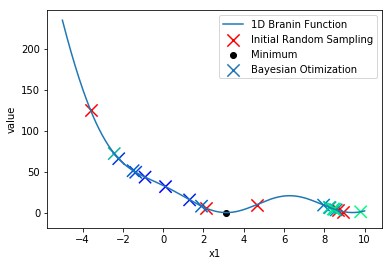

In [6]:
cmap = plt.get_cmap('winter')
plt.plot(branin_line_xs, branin_line_ys, label="1D Branin Function")

# Load the points evaluated by HyperMapper during optimization
sampled_points = pd.read_csv("1d_branin_output_samples.csv", usecols=['x1', 'value'])
x_points = sampled_points['x1'].values
y_points = sampled_points['value'].values

# Split between DoE and BO
doe_x = x_points[:number_of_RS]
doe_y = y_points[:number_of_RS]
bo_x = x_points[number_of_RS:]
bo_y = y_points[number_of_RS:]
bo_iterations = list(range(len(bo_x)))

plt.scatter(doe_x, doe_y, s=point_size, marker='x', color="red", label="Initial Random Sampling")
plt.scatter(optimum, value_at_optimum, s=point_size_optimum, marker='o', color="black", label="Minimum")
plt.scatter(bo_x, bo_y, s=point_size, marker='x', c=bo_iterations, cmap=cmap, label="Bayesian Otimization")

plt.legend()
plt.xlabel("x1")
plt.ylabel("value")
plt.show()

Blue points show points explored during optimization, with brighter points denoting points explored in later iterations. 

To see how far we land from the true minimum, we visualize the simple regret $R$:

$R = \min_{i=1,...,n} f(x_i) - f(x^{*})$

Difference between:
- the best value found by the HyperMapper $\min_{i=1,...,n} f(x_i)$ also called the incumbent, and
- the true minimum value: $f(x^{∗})$ 

No handles with labels found to put in legend.
/home/arturluis/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


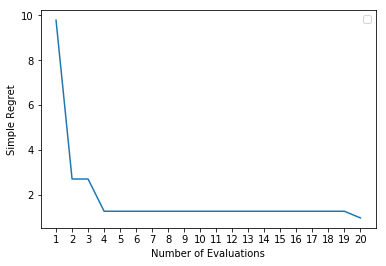

In [7]:
evaluation_counts = list(range(1, len(y_points)+1))
simple_regret = []
for x in evaluation_counts:
    incumbent = min(y_points[:x]) # find the incumbent after x evaluations
    simple_regret.append(incumbent - value_at_optimum)

plt.plot(evaluation_counts, simple_regret)

plt.legend()
plt.xlabel("Number of Evaluations")
plt.ylabel("Simple Regret")
plt.xticks(evaluation_counts)
plt.show()

### Example 2: Ordinal Input

In this example, we are showing how to optimize the Branin function with ordinal inputs. We use the same branin function we defined in Example 1, but change the optimization configuration.

The optimum in this case is at $x_1 = 3$

### Setup HyperMapper to Run on Branin with Ordinal Variables

We create a json for the new configuration in python and dump it on a file.

In [8]:
scenario = {}
scenario["application_name"] = "1d_branin"
scenario["optimization_objectives"] = ["value"]

number_of_RS = 3
scenario["design_of_experiment"] = {}
scenario["design_of_experiment"]["number_of_samples"] = number_of_RS

scenario["optimization_iterations"] = 5

scenario["input_parameters"] = {}
x1 = {}
x1["parameter_type"] = "ordinal"
x1["values"] = [-5.0, -4.5, -4.0, -3.5, -3.0, -1.5, -1.0, -0.5, 0.0, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 7.0, 7.5,
                8.0, 8.5, 9.0, 10.0]

scenario["input_parameters"]["x1"] = x1

with open("example_scenarios/demo/example_ordinal_1d_branin_scenario.json", "w") as scenario_file:
    json.dump(scenario, scenario_file, indent=4)

To double check, print the json generated: 

In [9]:
f = open("example_scenarios/demo/example_ordinal_1d_branin_scenario.json", "r")
text = f.read()
print(text, flush=True)
f.close()

{
    "application_name": "1d_branin",
    "optimization_objectives": [
        "value"
    ],
    "design_of_experiment": {
        "number_of_samples": 3
    },
    "optimization_iterations": 5,
    "input_parameters": {
        "x1": {
            "parameter_type": "ordinal",
            "values": [
                -5.0,
                -4.5,
                -4.0,
                -3.5,
                -3.0,
                -1.5,
                -1.0,
                -0.5,
                0.0,
                2.0,
                2.5,
                3.0,
                3.5,
                4.0,
                4.5,
                5.0,
                5.5,
                7.0,
                7.5,
                8.0,
                8.5,
                9.0,
                10.0
            ]
        }
    }
}


### Run HyperMapper

In [10]:
hypermapper.optimize("example_scenarios/demo/example_ordinal_1d_branin_scenario.json", branin_function)
sys.stdout = stdout

Design of experiment phase, number of doe samples = 3 .......
x1,value,Timestamp
-1.0,44.844061747777616,1
-4.5,190.30580997466993,1
5.0,13.730034933787277,1


End of doe phase, the number of new configuration runs is: 3

Starting optimization iteration 1
x1,value,Timestamp
9.0,1.2694494957564615,178

Starting optimization iteration 2
x1,value,Timestamp
5.5,18.060674124988978,369

Starting optimization iteration 3
x1,value,Timestamp
-1.5,51.6774984512692,513

Starting optimization iteration 4
x1,value,Timestamp
-3.0,93.8541933295621,635

Starting optimization iteration 5
x1,value,Timestamp
2.5,2.6137237843308414,789

End of Random Scalarizations
### End of the hypermapper script.


### Visualize Results
We visualize the optimization process with a scatterplot of the points explored during optimization.

/home/arturluis/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


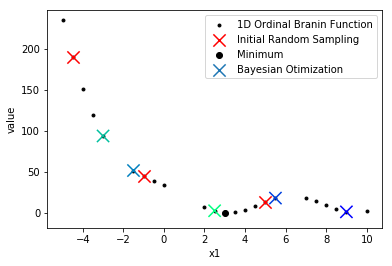

In [11]:
cmap = plt.get_cmap('winter')
point_size_ordinal = matplotlib.rcParams['lines.markersize']**1.2


branin_scatter_xs = x1["values"]
branin_scatter_ys = []
for x in branin_scatter_xs:
    y = branin_function({'x1': x})
    branin_scatter_ys.append(y)
plt.scatter(branin_scatter_xs, branin_scatter_ys, s=point_size_ordinal, marker='o', color="black", label="1D Ordinal Branin Function")

# Load the points evaluated by HyperMapper during optimization
sampled_points = pd.read_csv("1d_branin_output_samples.csv", usecols=['x1', 'value'])
x_points = sampled_points['x1'].values
y_points = sampled_points['value'].values

# Split between DoE and BO
doe_x = x_points[:number_of_RS]
doe_y = y_points[:number_of_RS]
bo_x = x_points[number_of_RS:]
bo_y = y_points[number_of_RS:]
bo_iterations = list(range(len(bo_x)))
optimum = 3

plt.scatter(doe_x, doe_y, s=point_size, marker='x', color="red", label="Initial Random Sampling")
plt.scatter(optimum, value_at_optimum, s=point_size_optimum, marker='o', color="black", label="Minimum")
plt.scatter(bo_x, bo_y, s=point_size, marker='x', c=bo_iterations, cmap=cmap, label="Bayesian Otimization")

plt.legend()
plt.xlabel("x1")
plt.ylabel("value")
plt.show()

Blue points show points explored during optimization, with brighter points denoting points explored in later iterations. 

To see how far we land from the true minimum, we visualize the simple regret $R$:

### Example 3: Multi-dimension Function

In this example, we are showing how to optimize the Branin function with two input parameters. We use the same branin function we defined in Example 1, but also optimize for $x_2 \in [0, 15]$.

The Branin function has three optima at $(-\pi, 12.275)$, $(\pi, 2.275)$, and $(9.42478, 2.475)$.

In [12]:
def branin_function(X):
    x1 = X['x1']
    x2 = X['x2']
    a = 1.0
    b = 5.1 / (4.0 * math.pi * math.pi)
    c = 5.0 / math.pi
    r = 6.0
    s = 10.0
    t = 1.0 / (8.0 * math.pi)

    value = a * (x2 - b * x1 * x1 + c * x1 - r) ** 2 + s * (1 - t) * math.cos(x1) + s

    return value

### Setup HyperMapper to Run on 2d Branin

We create a json for the new configuration in python and dump it on a file.

In [13]:
scenario = {}
scenario["application_name"] = "branin"
scenario["optimization_objectives"] = ["value"]

scenario["optimization_iterations"] = 20

scenario["input_parameters"] = {}
x1 = {}
x1["parameter_type"] = "real"
x1["values"] = [-5.0, 10.0]

x2 = {}
x2["parameter_type"] = "real"
x2["values"] = [0, 15.0]

scenario["input_parameters"]["x1"] = x1
scenario["input_parameters"]["x2"] = x2

with open("example_scenarios/demo/example_branin_scenario.json", "w") as scenario_file:
    json.dump(scenario, scenario_file, indent=4)

To double check, print the json generated: 

In [14]:
f = open("example_scenarios/demo/example_branin_scenario.json", "r")
text = f.read()
print(text, flush=True)
f.close()

{
    "application_name": "branin",
    "optimization_objectives": [
        "value"
    ],
    "optimization_iterations": 20,
    "input_parameters": {
        "x1": {
            "parameter_type": "real",
            "values": [
                -5.0,
                10.0
            ]
        },
        "x2": {
            "parameter_type": "real",
            "values": [
                0,
                15.0
            ]
        }
    }
}


### Run HyperMapper

In [15]:
hypermapper.optimize("example_scenarios/demo/example_branin_scenario.json", branin_function)
sys.stdout = stdout

Design of experiment phase, number of doe samples = 10 .......
x1,x2,value,Timestamp
-0.8134682746985709,8.930987911854743,19.001547313167066,1
-2.6558846799769626,6.077089812921413,27.123295183140165,1
1.6514542427111252,8.201645980489625,29.276078605549646,1
9.62440327279174,8.952310995910885,40.32615264478873,1
2.0891372627637503,5.503032037907107,10.36920797591931,1
-0.05195691793524837,6.164410087839802,19.595775974559523,1
7.269995872162593,0.5132155380717183,15.847686914329763,1
4.331649433243385,3.71862032711082,11.222375286328063,1
-0.3863612574682289,10.185051554591547,31.502873432879213,1
-2.51643843355867,12.814451348109731,6.179418551989251,1


End of doe phase, the number of new configuration runs is: 10

Starting optimization iteration 1
x1,x2,value,Timestamp
-1.2544620492102818,13.203641124629133,38.02516927360658,2455

Starting optimization iteration 2
x1,x2,value,Timestamp
-3.0649921093997925,12.603597452459297,0.6881156789655574,4855

Starting optimization iteration 

### Visualize Results
We visualize the optimization process with a scatterplot of the points explored during optimization.

/home/arturluis/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


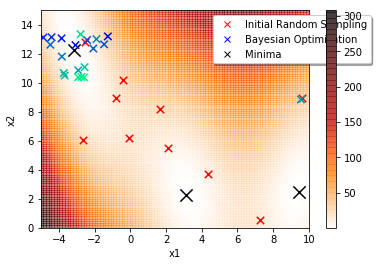

In [16]:
from matplotlib.lines import Line2D

# Plot the value of the Branin function over a grid of the space
heatmap_samples = 100
x1_heatmap_values = np.linspace(-5, 10, 100)
x2_heatmap_values = np.linspace(0, 15, 100)
branin_values = np.zeros((heatmap_samples, heatmap_samples), dtype=float)
for i, x1 in enumerate(x1_heatmap_values):
    for j, x2 in enumerate(x2_heatmap_values):
        branin_values[j,i] = branin_function({'x1': x1, 'x2': x2})

heat_cmap = plt.get_cmap("gist_heat_r")
cf = plt.pcolormesh(x1_heatmap_values, x2_heatmap_values, branin_values, cmap=heat_cmap, alpha=0.5)
plt.colorbar(cf)

# Load the points evaluated by HyperMapper during optimization
sampled_points = pd.read_csv("branin_output_samples.csv", usecols=['x1', 'x2'])
x1_points = sampled_points['x1'].values
x2_points = sampled_points['x2'].values

# Split between DoE and BO
doe_x1 = x1_points[:10]
doe_x2 = x2_points[:10]
bo_x1 = x1_points[10:]
bo_x2 = x2_points[10:]
bo_iterations = list(range(len(bo_x1)))

optima_x1 = [-3.141, 3.141, 9.425]
optima_x2 = [12.275, 2.275, 2.475]
plt.scatter(optima_x1, optima_x2, s=point_size, marker='x', color="black", label="Minima")
plt.scatter(doe_x1, doe_x2, s=point_size**0.8, marker='x', color="red", label="Initial Random Sampling")
plt.scatter(bo_x1, bo_x2, s=point_size**0.8, marker='x', c=bo_iterations, cmap=cmap, label="Bayesian Otimization")

plt.xlim(min(x1_heatmap_values), max(x1_heatmap_values))
plt.ylim(min(x2_heatmap_values), max(x2_heatmap_values))
plt.xlabel('x1')
plt.ylabel('x2')

legend_elements = [
    Line2D([0], [0], marker='x', color='red', linestyle='None', label="Initial Random Sampling"),
    Line2D([0], [0], marker='x', color='blue', linestyle='None', label="Bayesian Optimization"),
    Line2D([0], [0], marker='x', color='black', linestyle='None', label='Minima'),
]
plt.legend(handles=legend_elements, bbox_to_anchor=(1.25, 1), fancybox=True, shadow=True, ncol=1)

plt.show()

Blue points show points explored during optimization, with brighter points denoting points explored in later iterations.

### Example 4: Multi-dimension and Multi-objective Function

In this example, we are showing how to optimize the DTLZ1 function:
- 6 input dimensions
- 2 output dimensions

In [17]:
def dtlz1_function(X):
    """
    Compute the adapted DTLZ1 function proposed by Knowles: https://www.cs.bham.ac.uk/~jdk/parego/ParEGO-TR3.pdf. 
    :param X: dictionary containing the input points.
    :return: the two values of the dtlz1 function.
    """
    x1 = X['x1']
    x2 = X['x2']
    x3 = X['x3']
    x4 = X['x4']
    x5 = X['x5']
    x6 = X['x6']
    g_sum = (x2 - 0.5)**2 + (x3 - 0.5)**2 + (x4 - 0.5)**2 + (x5 - 0.5)**2 + (x6 - 0.5)**2
    g_cos = math.cos(2*math.pi*(x2 - 0.5)) + math.cos(2*math.pi*(x3 - 0.5)) + math.cos(2*math.pi*(x4 - 0.5))\
          + math.cos(2*math.pi*(x5 - 0.5)) + math.cos(2*math.pi*(x6 - 0.5))
    g = 100*(5 + g_sum - g_cos)
    f1_value = 0.5*x1*(1 + g)
    f2_value = 0.5*(1 - x1)*(1 + g)

    output_metrics = {}
    output_metrics['f1_value'] = f1_value
    output_metrics['f2_value'] = f2_value

    return output_metrics

This is not a function we can easily visualize because of the multiple input/output dimensions. 

### Setup HyperMapper to Run on DTLZ1

We create the json in python and then dump it on a file: 

In [18]:
scenario = {}
scenario["application_name"] = "dtlz1"
scenario["optimization_objectives"] = ["f1_value", "f2_value"]

number_of_RS = 10
scenario["design_of_experiment"] = {}
scenario["design_of_experiment"]["number_of_samples"] = number_of_RS

scenario["optimization_iterations"] = 10

scenario["input_parameters"] = {}
x1 = {}
x1["parameter_type"] = "real"
x1["values"] = [0, 1]
scenario["input_parameters"]["x1"] = x1
x2 = {}
x2["parameter_type"] = "real"
x2["values"] = [0, 1]
scenario["input_parameters"]["x2"] = x2
x3 = {}
x3["parameter_type"] = "real"
x3["values"] = [0, 1]
scenario["input_parameters"]["x3"] = x3
x4 = {}
x4["parameter_type"] = "real"
x4["values"] = [0, 1]
scenario["input_parameters"]["x4"] = x4
x5 = {}
x5["parameter_type"] = "real"
x5["values"] = [0, 1]
scenario["input_parameters"]["x5"] = x5
x6 = {}
x6["parameter_type"] = "real"
x6["values"] = [0, 1]
scenario["input_parameters"]["x6"] = x6

with open("example_scenarios/demo/example_dtlz1_scenario.json", "w") as scenario_file:
    json.dump(scenario, scenario_file, indent=4)


To double check, print the json generated:

In [19]:
f = open("example_scenarios/demo/example_dtlz1_scenario.json", "r")
text = f.read()
print(text, flush=True)
f.close()

{
    "application_name": "dtlz1",
    "optimization_objectives": [
        "f1_value",
        "f2_value"
    ],
    "design_of_experiment": {
        "number_of_samples": 10
    },
    "optimization_iterations": 10,
    "input_parameters": {
        "x1": {
            "parameter_type": "real",
            "values": [
                0,
                1
            ]
        },
        "x2": {
            "parameter_type": "real",
            "values": [
                0,
                1
            ]
        },
        "x3": {
            "parameter_type": "real",
            "values": [
                0,
                1
            ]
        },
        "x4": {
            "parameter_type": "real",
            "values": [
                0,
                1
            ]
        },
        "x5": {
            "parameter_type": "real",
            "values": [
                0,
                1
            ]
        },
        "x6": {
            "parameter_type": "real",
  

### Run HyperMapper

In [20]:
hypermapper.optimize("example_scenarios/demo/example_dtlz1_scenario.json", dtlz1_function)
sys.stdout = stdout

Design of experiment phase, number of doe samples = 10 .......
x1,x2,x3,x4,x5,x6,f1_value,f2_value,Timestamp
0.33924433279218125,0.4893832898221859,0.5672580365681169,0.5814306566531957,0.6614653367116449,0.8779837570690576,44.113182945992826,85.92047917273815,1
0.23136960122592398,0.3313955041941964,0.34922387712355113,0.7245852772811636,0.6876108561683204,0.6459180514513366,34.074392153322364,113.19816211818697,2
0.21142838339563505,0.044788915154599825,0.6624269588569806,0.4845319066001479,0.5421663361319693,0.974080925735242,52.164898576933425,194.56119249533256,2
0.5358053763183213,0.1601940097363904,0.8070379240260657,0.7894648171367014,0.05510523598908593,0.26215636737392917,202.35674468938666,175.3116282557306,2
0.15186071988021763,0.5168696904693901,0.5011210549486387,0.7553550440797493,0.6430221266001315,0.26126488799400543,18.973630001064333,105.9673686721282,2
0.013221690922653037,0.6677852789173262,0.7190025273619101,0.16868487421850337,0.1259675607829279,0.515951242194300

### Visualize Results
We can visualize the optimization process using a Pareto front. 

This script computes the Pareto front from the output of HyperMapper: 

In [21]:
!!python3 scripts/compute_pareto.py "example_scenarios/demo/example_dtlz1_scenario.json"

['######## compute_pareto.py #####################',
 '### Parameters file is example_scenarios/demo/example_dtlz1_scenario.json',
 '### The input data file is ./dtlz1_output_samples.csv',
 '### The output Pareto file is ./dtlz1_output_pareto.csv',
 '################################################',
 'Computing the Pareto...',
 'Time to read from file ./dtlz1_output_samples.csv and create the data array is: 0.000214 sec',
 'Total time of computation is (read and Pareto computation): 0.00103 seconds',
 'The total size of the Pareto (RS + AL) is: 5',
 'End of the compute_pareto.py script!',
 '']

This scripts plot the Pareto front:

In [22]:
!!python3 scripts/plot_dse.py "example_scenarios/demo/example_dtlz1_scenario.json" "example_scenarios/demo/dtlz1_output_pareto.pdf"

['######### plot_dse.py ##########################',
 '### Parameters file is example_scenarios/demo/example_dtlz1_scenario.json',
 '### The Pareto and DSE data files are: ./dtlz1_output_pareto.csv ./dtlz1_output_samples.csv ',
 '### The first output pdf image is example_scenarios/demo/dtlz1_output_pareto.pdf',
 '### The second output pdf image is example_scenarios/demo/all_dtlz1_output_pareto.pdf',
 '################################################',
 'Loading data from ./dtlz1_output_pareto.csv ...',
 'Time to read from file ./dtlz1_output_pareto.csv and create the data array is: 0.000153 sec',
 "Parameters are ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'f1_value', 'f2_value', 'Timestamp']",
 '',
 'Size of the data file ./dtlz1_output_pareto.csv is 5',
 'Loading data from ./dtlz1_output_samples.csv ...',
 'Time to read from file ./dtlz1_output_samples.csv and create the data array is: 0.000395 sec',
 "Parameters are ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'f1_value', 'f2_value', 'Timestamp']"

In [23]:
from IPython.display import IFrame
IFrame("./dtlz1_output_pareto.pdf", width=1000, height=600)

### Example 5: Conditional Function

In this example, we are showing how to optimize the conditional Chakong-Haimes function:
- 2 input dimensions
- 2 output dimensions

The Chakong-Haimes function has two feasibility constraints:

$x_1^2 + x_2^2 \leq 225$

$x_1 - 3x_2 + 10 \leq 0$

In [24]:
def chakong_haimes(X):
    x1 = X['x1']
    x2 = X['x2']
    f1_value = 2 + (x1 - 2)*(x1 - 2) + (x2 - 1)*(x2 - 1)
    f2_value = 9*x1 - (x2 - 1)*(x2 - 1)

    # check constraints
    c1 = x1*x1 + x2*x2 <= 225
    c2 = x1 - 3*x2 + 10 <= 0
    valid = c1 and c2

    output = {}
    output['f1_value'] = f1_value
    output['f2_value'] = f2_value
    output['Valid'] = valid

    return output

### Setup HyperMapper to Run on Chakong-Haimes

We create the json in python and then dump it on a file: 

In [25]:
scenario = {}
scenario["application_name"] = "chakong_haimes"
scenario["optimization_objectives"] = ["f1_value", "f2_value"]

number_of_RS = 20
scenario["design_of_experiment"] = {}
scenario["design_of_experiment"]["number_of_samples"] = number_of_RS

scenario["optimization_iterations"] = 10

scenario["input_parameters"] = {}
x1 = {}
x1["parameter_type"] = "real"
x1["values"] = [-20, 20]
scenario["input_parameters"]["x1"] = x1
x2 = {}
x2["parameter_type"] = "real"
x2["values"] = [-20, 20]
scenario["input_parameters"]["x2"] = x2

scenario["feasible_output"] = {}
scenario["feasible_output"]["enable_feasible_predictor"] = True

with open("example_scenarios/demo/example_chakong_haimes_scenario.json", "w") as scenario_file:
    json.dump(scenario, scenario_file, indent=4)

To double check, print the json generated:

In [26]:
f = open("example_scenarios/demo/example_chakong_haimes_scenario.json", "r")
text = f.read()
print(text, flush=True)
f.close()

{
    "application_name": "chakong_haimes",
    "optimization_objectives": [
        "f1_value",
        "f2_value"
    ],
    "design_of_experiment": {
        "number_of_samples": 20
    },
    "optimization_iterations": 10,
    "input_parameters": {
        "x1": {
            "parameter_type": "real",
            "values": [
                -20,
                20
            ]
        },
        "x2": {
            "parameter_type": "real",
            "values": [
                -20,
                20
            ]
        }
    },
    "feasible_output": {
        "enable_feasible_predictor": true
    }
}


### Run HyperMapper

In [27]:
hypermapper.optimize("example_scenarios/demo/example_chakong_haimes_scenario.json", chakong_haimes)
sys.stdout = stdout

Design of experiment phase, number of doe samples = 20 .......
x1,x2,f1_value,f2_value,Valid,Timestamp
-15.70630326244054,4.404409361077583,327.1031783193053,-152.94673245975753,False,1
-6.1018632472663334,-7.330904061219357,137.04415055464614,-124.32073170263818,False,1
19.17278607212475,-9.624229529012627,409.77883456410575,59.680821563978895,False,1
-10.00797025531966,-10.39122717476185,275.9514061996746,-219.8317888449098,False,1
-7.987000005524676,-3.7739926258745413,124.53117470225438,-94.67400564162658,False,1
16.59216850763572,19.722995242515672,565.4819326065002,-201.22103428254303,False,1
11.5985023006923,-12.072976816255007,265.0339692547363,-66.51620213211021,False,1
13.003368710657035,-17.79975175730493,476.504789118956,-236.40034774037642,False,1
10.81387900373608,17.908933264585443,365.5964872387038,-188.58711311257937,False,1
-18.6410208384221,2.9916876796664766,432.01856106551065,-171.73600735913413,False,2
1.6610852038741442,-13.663079834558154,217.12077347365903,-200

### Visualize Results
We can visualize the optimization process using a Pareto front. 

The Pareto script computes the Pareto front considering only feasible points: 

In [28]:
!!python3 scripts/compute_pareto.py "example_scenarios/demo/example_chakong_haimes_scenario.json"
!!python3 scripts/plot_dse.py "example_scenarios/demo/example_chakong_haimes_scenario.json" "example_scenarios/demo/chakong_haimes_output_pareto.pdf"
IFrame("./chakong_haimes_output_pareto.pdf", width=1000, height=600)